# Mobile Prices Classification
Dataset was taken from Kaggle: [Mobile Price Classification
](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification?select=train.csv)

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
data = pd.read_csv("train.csv")

Checking for empty or missing values

In [4]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

There are no missing values and all the numbers are numerical

## Data Exploration / Analysis

Let us check the correlation between the values to the phone's price range.

<Axes: >

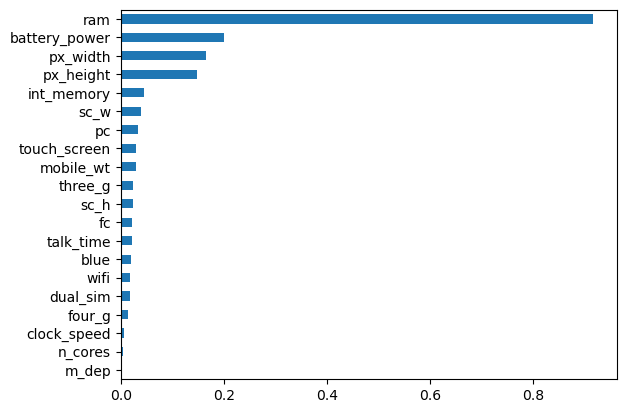

In [23]:
corr_arr = []
name_arr = []


for col in range(len(data.columns)):
    if data.columns[col] == "price_range":
        continue

    name_arr.append(data.columns[col])

    corr = data.corr()["price_range"][col]
    if corr < 0: corr *= -1
    corr_arr.append(corr)

pd.Series(corr_arr, name_arr).sort_values().plot(kind="barh")

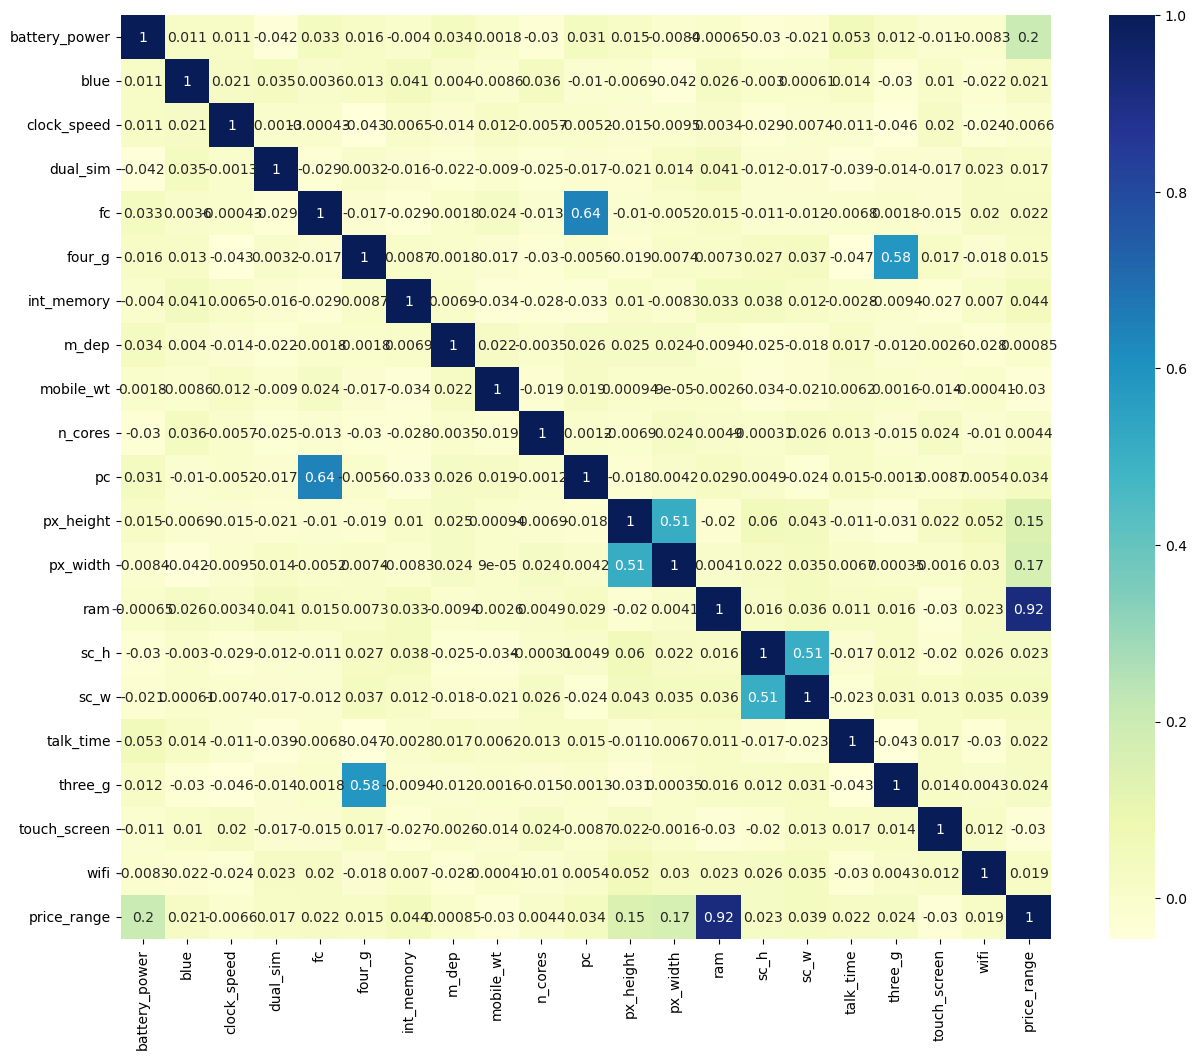

In [7]:
plt.figure(figsize=(15,12))
r = sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

These values have the highest correlation to price:
- ram
- battery power
- screen dimensions
- internal memory

### How Ram affects price

<Axes: xlabel='price_range', ylabel='ram'>

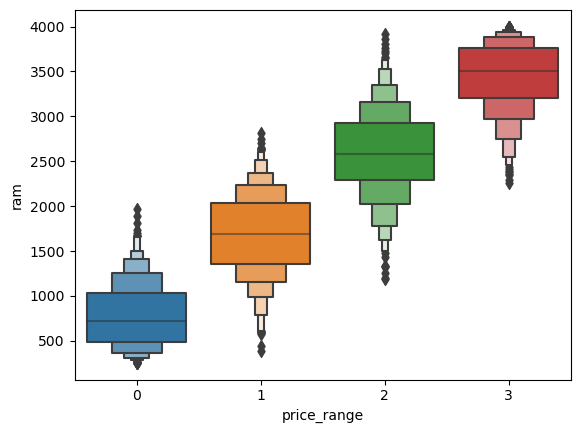

In [30]:
sns.boxenplot(data=data, y="ram", x="price_range")

<Axes: xlabel='price_range', ylabel='ram'>

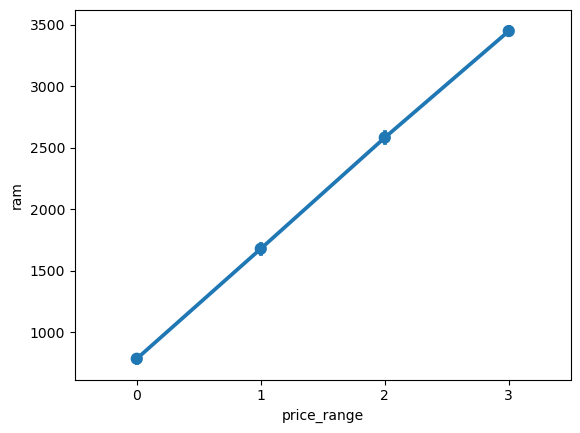

In [34]:
sns.pointplot(data=data, y="ram", x="price_range")

We can see as the ram goes higher, so does the price range. Ram greatly affects the price of the mobile device.

### How Internal Memory affects price range

<Axes: xlabel='price_range', ylabel='int_memory'>

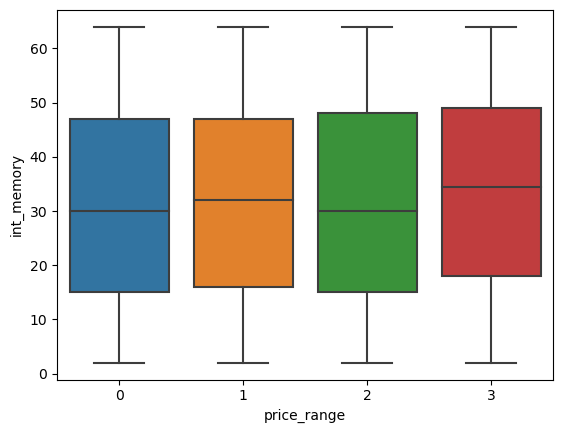

In [33]:
sns.boxplot(data=data, y="int_memory", x="price_range")

<Axes: xlabel='price_range', ylabel='int_memory'>

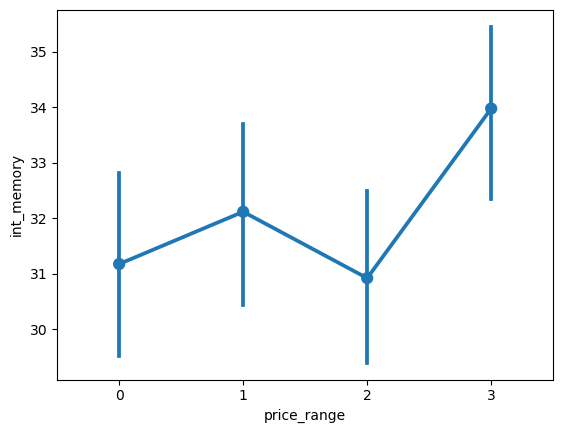

In [28]:
sns.pointplot(data=data, y="int_memory", x="price_range")

The price range seems to dip for price range 2

### How Battery power affects price range

<Axes: xlabel='price_range', ylabel='battery_power'>

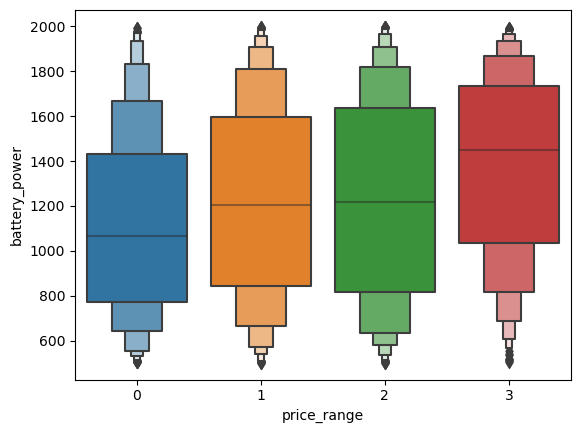

In [35]:
sns.boxenplot(data=data, y="battery_power", x="price_range")

<Axes: xlabel='price_range', ylabel='battery_power'>

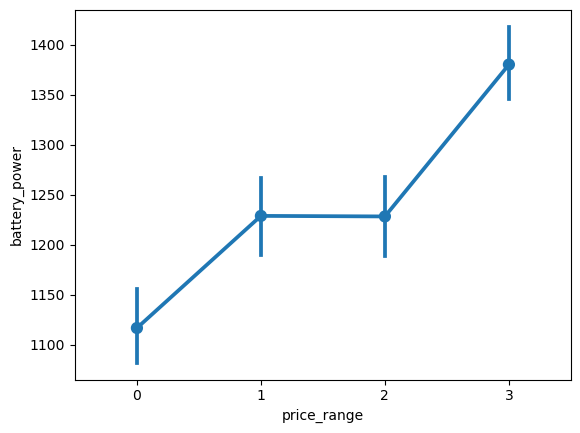

In [31]:
sns.pointplot(data=data, y="battery_power", x="price_range")

Battery power affects price range

## Machine Learning

### Data Processing / Splitting

In [9]:
X = data.drop(["price_range"], axis=1)
Y = data["price_range"]

Splitting the data

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

Scaling the data

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(max_iter=5000)
lg.fit(X_train, Y_train)

LogisticRegression(max_iter=5000)

In [13]:
from sklearn.metrics import accuracy_score

lg_prediction = lg.predict(X_train)
lg_acc = accuracy_score(Y_train, lg_prediction)
print(str(round(lg_acc * 10000) / 100) + "% Accuracy")

97.56% Accuracy


### Random Forest Classififer

In [14]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, Y_train)

RandomForestClassifier()

In [15]:
from sklearn.metrics import accuracy_score

forest_prediction = forest.predict(X_train)
forest_acc = accuracy_score(Y_train, forest_prediction)
print(str(round(forest_acc * 10000) / 100) + "% Accuracy")

100.0% Accuracy


### KNN Classifier

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [17]:
from sklearn.metrics import accuracy_score

knn_prediction = knn.predict(X_train)
knn_acc = accuracy_score(Y_train, knn_prediction)
print(str(round(knn_acc * 10000) / 100) + "% Accuracy")

69.31% Accuracy


## Comparison of Models

We will now compare the scores of the models. Random Forest Classifier has the highest score whilst KNN has the lowest.

In [18]:
model_scores = {"Logistic Regression": lg_acc, "Random Forest Classifier": forest_acc, "KNeighborsClassifier": knn_acc}
pd.DataFrame.from_dict(model_scores, orient="index", columns=["Score"])

,Score
Logistic Regression,0.975625
Random Forest Classifier,1.000000
KNeighborsClassifier,0.693125


Now let's compare the data

In [19]:
model_predictions = {"Base": Y_train,"Logistic Regression": lg_prediction, "Random Forest Classifier": forest_prediction, "KNeighborsClassifier": knn_prediction}
pd.DataFrame(model_predictions)

,Base,Logistic Regression,Random Forest Classifier,KNeighborsClassifier
1478,2,2,2,1
87,3,3,3,1
750,3,3,3,3
838,2,2,2,2
549,1,1,1,1
...,...,...,...,...
952,3,3,3,2
1667,1,1,1,2
1273,1,1,1,1
1688,3,3,3,3
